<center> <b> <h1> Mall Customer Segmentation </h1> </center> </b> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\Lenovo PC\Desktop\Online Works\DevIncept\mallCustomerSegmentation\dataset\Mall_Customers.csv") # Please change this path according to dataset location on your computer
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Problem Statement
In this, we are given data on mall customers. We want to make clusters based on spending score and Annual Income. With these clusters, Analysts maybe interested in recognising Opportunity customers (High income, low spending) and Loyal customer group (low income, high spending or high income/ high spending)

# EDA

In [3]:
data.drop(columns=['CustomerID'],inplace=True) 
# CustomerID is a unique column, so it own't be useful.

<AxesSubplot:>

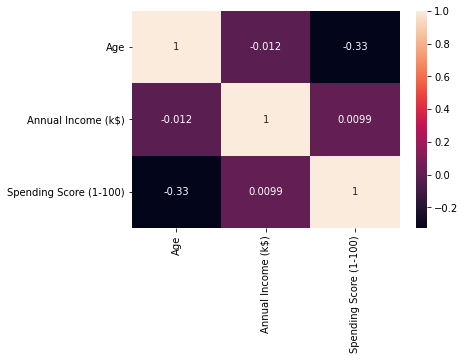

In [4]:
sns.heatmap(data.corr(),annot=True)

### There is no strong correlation between any features. Though a low negative correlation can be seen between age and spending score. This means that as Age increases, Spending score decreases. This might be true because young people tend to buy more from malls whereas old people tend to buy from nearby retail shops due to ease of access.

In [5]:
data.shape

(200, 4)

<AxesSubplot:ylabel='Gender'>

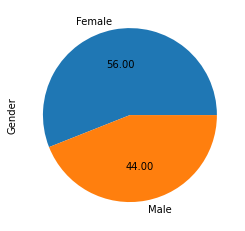

In [6]:
data['Gender'].value_counts().plot(kind='pie',autopct="%.2f")

### The footfall of female customers in mall is greater than the male customers.

<AxesSubplot:xlabel='Age', ylabel='Gender'>

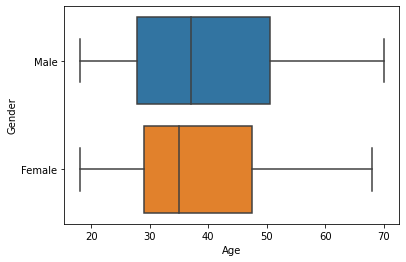

In [7]:
sns.boxplot(data=data,x= 'Age',y = 'Gender')

### Median age of female mall customers is less than the male mall customers. 

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Gender'>

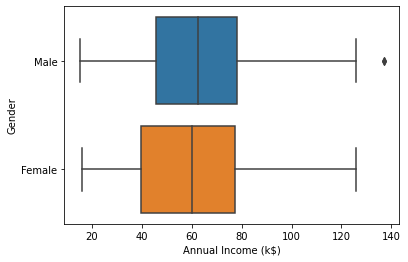

In [8]:
sns.boxplot(data=data,x= 'Annual Income (k$)',y = 'Gender')

### Median Annual Income of female mall customers is less than the male mall customers. 

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Gender'>

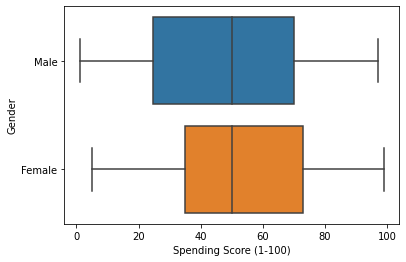

In [9]:
sns.boxplot(data=data,x= 'Spending Score (1-100)',y = 'Gender')

### Median Spending score of female mall customers is same as the male mall customers.

In [10]:
data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
data.duplicated().sum()

0

### No null values or duplicates.

## Converting Categorical to Numerical Feature

In [12]:
data['Gender'] = pd.get_dummies(data['Gender'],drop_first=True)

In [13]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## Multivariate Analysis

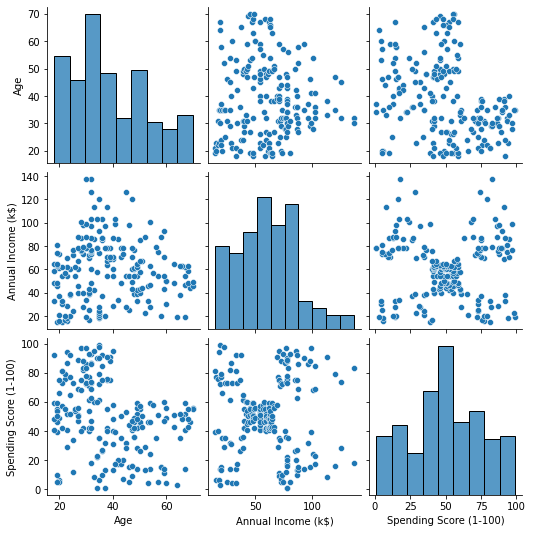

In [14]:
sns.pairplot(data.iloc[:,1:4])

## The distribution of none of the varaible is perfectly normal. They're a little skewed.

# Clustering

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertia_values = []
ss=[]
for i in range(2, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data)
    label = kmeans.labels_
    inertia_values.append(kmeans.inertia_)
    ss.append(silhouette_score(data,label))

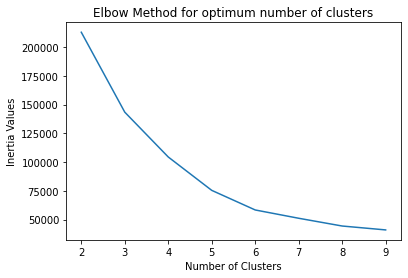

In [16]:
plt.plot(range(2,10),inertia_values)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Values')
plt.title('Elbow Method for optimum number of clusters')
plt.show()

### As we can see that 5 clusters seems to be optimum. This is because if you look carefully, you can see an elbow over there. If not, you can try to fit different models and then plot in matplotlub as done below. Like this you can visualise and then decide.

In [17]:
# We can now fit kmeans for 5 clusters.
kmeans = KMeans(n_clusters = 5, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(data)


In [18]:
kmeans.cluster_centers_ #We'll pot these centroids to see how are points around it

array([[ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.41772152, 43.08860759, 55.29113924, 49.56962025],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333],
       [ 0.39130435, 25.52173913, 26.30434783, 78.56521739]])

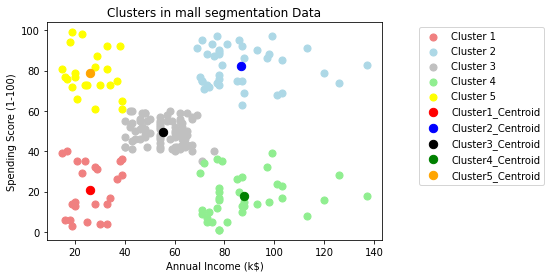

In [19]:
plt.scatter(data[y_kmeans == 0]['Annual Income (k$)'], data[y_kmeans == 0]['Spending Score (1-100)'], s = 50, c = 'lightcoral', label = 'Cluster 1') # Flower names can be seen in description
plt.scatter(data[y_kmeans == 1]['Annual Income (k$)'], data[y_kmeans == 1]['Spending Score (1-100)'], s = 50, c = 'lightblue', label = 'Cluster 2')
plt.scatter(data[y_kmeans == 2]['Annual Income (k$)'], data[y_kmeans == 2]['Spending Score (1-100)'],s = 50, c = 'silver', label = 'Cluster 3')
plt.scatter(data[y_kmeans == 3]['Annual Income (k$)'], data[y_kmeans == 3]['Spending Score (1-100)'], s = 50, c = 'lightgreen', label = 'Cluster 4')
plt.scatter(data[y_kmeans == 4]['Annual Income (k$)'], data[y_kmeans == 4]['Spending Score (1-100)'],s = 50, c = 'yellow', label = 'Cluster 5')
#I've plotted this based on sepal length and sepal width . 
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters in mall segmentation Data')
plt.scatter(kmeans.cluster_centers_[0,2],kmeans.cluster_centers_[0,3],label ='Cluster1_Centroid',c='red',s=70 )
plt.scatter(kmeans.cluster_centers_[1,2],kmeans.cluster_centers_[1,3],label ='Cluster2_Centroid',c='Blue',s=70 )
plt.scatter(kmeans.cluster_centers_[2,2],kmeans.cluster_centers_[2,3],label ='Cluster3_Centroid',c='black',s=70 )
plt.scatter(kmeans.cluster_centers_[3,2],kmeans.cluster_centers_[3,3],label ='Cluster4_Centroid',c='green',s=70 )
plt.scatter(kmeans.cluster_centers_[4,2],kmeans.cluster_centers_[4,3],label ='Cluster5_Centroid',c='orange',s=70 )
plt.legend(loc='upper right',bbox_to_anchor=(1.5, 1))
plt.show()

From the above, we can see that there are 5 kinds of mall customers based on Spending score and Annual Income.

1. Cluster 1 : Low Spending, Low Income
2. Cluster 2 : High Spending, High Income
3. Cluster 3 : Medium Spending, Medium Income
4. Cluster 4: Low Spending, High Income
5. Cluster 5 : High Spending, Low Income

We can say that Cluster 4 is our Opportunity, since, they earn more, they can spend more.
Cluster 5 are our loyal customers. They spend major part of their salary in our mall.